In [ ]:
# ----------------------------
# Step 1: Install and import packages
# ----------------------------

# Install packages
!pip install gseapy

# Import libraries
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 kB 14.3 MB/s eta 0:00:00


In [ ]:
# ----------------------------
# Step 2a: Check column names in your TNBC vs other breast cancer types DEG file
# ----------------------------

import pandas as pd

deg = pd.read_csv("/content/DESeq2_TNBC_vs_Other_full_results.csv")

# Print the column names
print(deg.columns)


Index(['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj',
       'gene_symbol', 'Ensembl_ID'],
      dtype='object')


In [ ]:
# ----------------------------
# Step 2b: Prepare gene list from DEGs
# ----------------------------

# Filter significant DEGs (adjust p-value threshold if needed)
sig_deg = deg[deg['pvalue'] < 0.05]

# Create a list of gene symbols
gene_list = sig_deg['gene_symbol'].tolist()

print(f"Number of significant DEGs: {len(gene_list)}")
print("Top 10 genes:", gene_list[:10])


Number of significant DEGs: 4111
Top 10 genes: ['CPB1', nan, 'IGHG1', 'COL1A1', 'FN1', 'COL1A2', 'IGKC', 'COL3A1', 'CSN2', 'LTF']


In [ ]:
# ----------------------------
# Step 2c: Clean gene list
# ----------------------------

# Keep only non-null values and convert everything to string
gene_list = [str(g) for g in sig_deg['gene_symbol'] if pd.notnull(g)]

print(f"Number of genes after cleaning: {len(gene_list)}")
print("Top 10 genes:", gene_list[:10])


Number of genes after cleaning: 4093
Top 10 genes: ['CPB1', 'IGHG1', 'COL1A1', 'FN1', 'COL1A2', 'IGKC', 'COL3A1', 'CSN2', 'LTF', 'IGFBP5']


In [ ]:
# ----------------------------
# Step 3: Enrichment analysis with Enrichr
# ----------------------------

import gseapy as gp

# Run enrichment for KEGG pathways and GO Biological Processes
enr = gp.enrichr(
    gene_list=gene_list,  # cleaned gene list from Step 2d
    gene_sets=['KEGG_2021_Human', 'GO_Biological_Process_2021'],
    organism='Human',           # for human genes
    outdir='enrichr_results',   # folder to save results
    cutoff=0.05                  # only show results with adjusted p-value < 0.05
)

# View top 10 enriched terms
enr.results.head(10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Protein processing in endoplasmic reticulum,96/171,8.700801e-25,2.766855e-22,0,0,5.071632,280.974540,ERO1A;TRAM1;HSP90AB1;UBXN1;TUSC3;PRKCSH;HERPUD...
1,KEGG_2021_Human,Focal adhesion,101/201,3.981003e-21,6.329795e-19,0,0,4.000521,187.915493,TNC;ACTB;ARHGAP35;CRKL;MYLK;ACTG1;IGF1R;COMP;P...
2,KEGG_2021_Human,Coronavirus disease,108/232,2.961131e-19,3.138799e-17,0,0,3.450641,147.216591,RPL4;RPL5;RPL30;RPL32;RPL31;RPL34;F13A1;RPL8;R...
3,KEGG_2021_Human,Pathways in cancer,196/531,5.795770e-19,4.607638e-17,0,0,2.338647,98.204421,RB1;CALML5;KEAP1;CRKL;TFG;MYC;AKT3;AKT1;PRKACB...
4,KEGG_2021_Human,Proteoglycans in cancer,98/205,1.354138e-18,8.612316e-17,0,0,3.623421,149.079744,ACTB;ACTG1;IGF1R;PPP1CB;PPP1CC;CCND1;PLAU;MYC;...
5,KEGG_2021_Human,Regulation of actin cytoskeleton,102/218,1.853906e-18,9.825702e-17,0,0,3.480218,142.094636,CYFIP2;NCKAP1;ACTB;ARHGAP35;CRKL;MYLK;ACTG1;PP...
6,KEGG_2021_Human,Prion disease,119/273,3.033359e-18,1.378012e-16,0,0,3.064069,123.594919,NDUFA10;PSMD8;TUBB6;PSMD4;CREB3L4;KIF5C;CREB3L...
7,KEGG_2021_Human,Parkinson disease,111/249,5.462777e-18,2.083262e-16,0,0,3.186276,126.649933,CALML5;NDUFA10;UBE2L6;UBE2L3;PSMD8;TUBB6;PSMD4...
8,KEGG_2021_Human,Human papillomavirus infection,136/331,5.896024e-18,2.083262e-16,0,0,2.770174,109.899064,RB1;PATJ;TNC;PPP2R2A;UBE3A;RBPJ;COMP;CCND3;CCN...
9,KEGG_2021_Human,PI3K-Akt signaling pathway,142/354,1.332709e-17,4.238013e-16,0,0,2.661610,103.421460,CSF3R;CSF1;IRS1;TNC;PPP2R2A;IGF1R;COMP;CCND3;C...


/tmp/ipython-input-1120994132.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


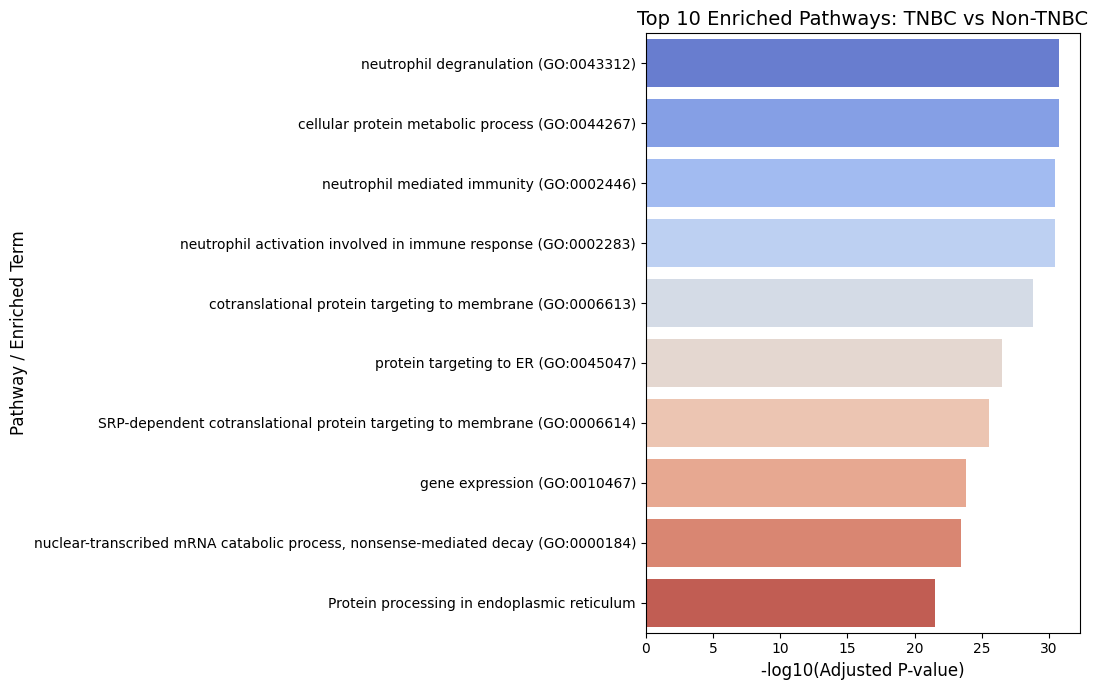

In [ ]:
# ----------------------------
# Step 4: Visualize top enriched pathways (TNBC vs Non-TNBC)
# ----------------------------

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sort by adjusted p-value and take top 10 terms
top10 = enr.results.sort_values('Adjusted P-value').head(10)

# Convert Adjusted P-value to -log10 scale for plotting
top10['-log10(Adjusted P-value)'] = -np.log10(top10['Adjusted P-value'])

# Plot
plt.figure(figsize=(11,7))  # expanded for centering and readability
sns.barplot(
    x='-log10(Adjusted P-value)',
    y='Term',
    data=top10,
    palette='coolwarm'
)

# Labels and formatting (consistent with Early vs Late plot)
plt.xlabel('-log10(Adjusted P-value)', fontsize=12)
plt.ylabel('Pathway / Enriched Term', fontsize=12)
plt.title('Top 10 Enriched Pathways: TNBC vs Non-TNBC', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
# ----------------------------
# Step 5: Load late vs early TNBC DEGs
# ----------------------------

# Load CSV for late vs early stage DEGs
deg_stage = pd.read_csv("/content/DESeq2_Early_vs_Late_full_results.csv")  # Adjust filename/path

# Preview the data
deg_stage.head()

# Check column names to find your gene symbol column
print(deg_stage.columns)


Index(['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj',
       'gene_symbol', 'Ensembl_ID'],
      dtype='object')


In [ ]:
# ----------------------------
# Step 6: Prepare gene list from DEGs (Early vs Late TNBC)
# ----------------------------

# Filter significant DEGs (raw p-value < 0.05) — consistent with TNBC vs Other
sig_deg_stage = deg_stage[deg_stage['pvalue'] < 0.05]

# Clean the gene list: remove any missing gene symbols and convert to string
gene_list_stage = [str(g) for g in sig_deg_stage['gene_symbol'] if pd.notnull(g)]

# Print summary statistics
print(f"Number of significant DEGs (p < 0.05): {len(gene_list_stage)}")
print("Top 10 genes:", gene_list_stage[:10])


Number of significant DEGs (p < 0.05): 826
Top 10 genes: ['LTF', 'COL1A1', 'IGHM', 'ACTB', 'SMR3B', 'FTL', 'FABP7', 'KRT5', 'HLA-B', 'KRT14']


In [ ]:
# ----------------------------
# Step 6b: Clean gene list (Early vs Late TNBC)
# ----------------------------

# Keep only non-null values and convert everything to string
gene_list_stage = [str(g) for g in sig_deg_stage['gene_symbol'] if pd.notnull(g)]

# Display summary
print(f"Number of genes after cleaning: {len(gene_list_stage)}")
print("Top 10 genes:", gene_list_stage[:10])


Number of genes after cleaning: 826
Top 10 genes: ['LTF', 'COL1A1', 'IGHM', 'ACTB', 'SMR3B', 'FTL', 'FABP7', 'KRT5', 'HLA-B', 'KRT14']


In [ ]:
# ----------------------------
# Step 7: Run Enrichr enrichment (Early vs Late TNBC)
# ----------------------------

enr_stage = gp.enrichr(
    gene_list = gene_list_stage,                   # Cleaned gene list from Step 6b
    gene_sets = ['KEGG_2021_Human', 'GO_Biological_Process_2021'],  # Same databases as TNBC vs Other
    organism = 'Human',
    outdir = 'enrichr_results_stage',              # Output folder for this comparison
    cutoff = 0.05
)

# View top 10 enriched pathways / GO terms
enr_stage.results.head(10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Phagosome,22/152,3.014352e-07,0.000055,0,0,4.008496,60.186408,ATP6V1G1;ATP6V0B;ATP6V0E1;ITGB5;ATP6AP1;HLA-B;...
1,KEGG_2021_Human,Human papillomavirus infection,35/331,3.697034e-07,0.000055,0,0,2.821992,41.795301,CDKN1A;HDAC2;ITGB5;LAMC2;PSEN1;PTGS2;THBS3;PPP...
2,KEGG_2021_Human,Vibrio cholerae infection,10/50,3.128637e-05,0.003076,0,0,5.862132,60.803960,ATP6V0B;ATP6V1G1;ATP6V0E1;ATP6AP1;KDELR1;PLCG2...
3,KEGG_2021_Human,Epithelial cell signaling in Helicobacter pylo...,11/70,1.300624e-04,0.009592,0,0,4.372777,39.125409,CDC42;ATP6V0B;ATP6V1G1;ADAM17;ATP6V0E1;ATP6AP1...
4,KEGG_2021_Human,Osteoclast differentiation,15/127,2.404219e-04,0.014185,0,0,3.147899,26.231809,CSF1R;TGFB1;IL1R1;STAT1;IFNGR2;FHL2;CYBA;GAB2;...
5,KEGG_2021_Human,HIF-1 signaling pathway,13/109,5.573631e-04,0.027404,0,0,3.177711,23.808345,CREBBP;CDKN1A;FLT1;IFNGR2;SERPINE1;ENO2;HK2;MT...
6,KEGG_2021_Human,Protein processing in endoplasmic reticulum,17/171,7.398076e-04,0.031178,0,0,2.595316,18.709943,BCAP31;VCP;FBXO2;SYVN1;EIF2AK2;RRBP1;EIF2AK4;H...
7,KEGG_2021_Human,Protein digestion and absorption,12/103,1.106098e-03,0.040787,0,0,3.091449,21.043237,COL17A1;COL1A1;KCNK5;COL18A1;COL2A1;SLC7A8;COL...
8,KEGG_2021_Human,Ferroptosis,7/41,1.315856e-03,0.041612,0,0,4.811463,31.915724,PRNP;MAP1LC3B;TF;HMOX1;SLC39A8;SLC39A14;FTL
9,KEGG_2021_Human,Pathways in cancer,37/531,1.410582e-03,0.041612,0,0,1.773269,11.639300,CSF1R;CDKN1A;HDAC2;RALA;EPAS1;CXCR4;LAMC2;PTGS...


/tmp/ipython-input-3613770263.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='-log10(Adjusted P-value)', y='Term', data=top10_stage, palette='coolwarm')


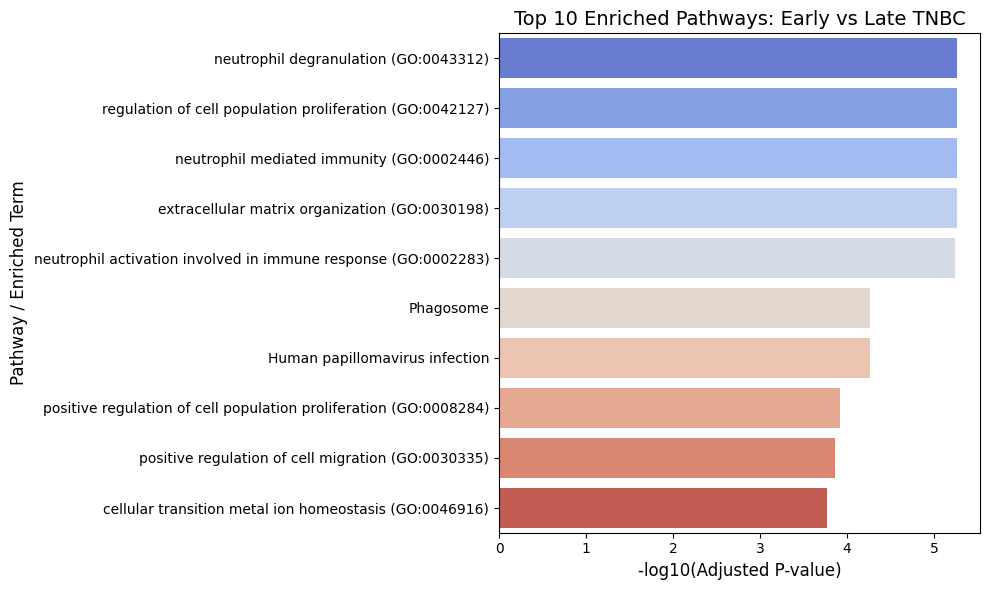

In [ ]:
# ----------------------------
# Step 8: Visualize top enriched pathways (Early vs Late TNBC)
# ----------------------------

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sort by adjusted p-value and take top 10 terms
top10_stage = enr_stage.results.sort_values('Adjusted P-value').head(10)

# Convert Adjusted P-value to -log10 scale for plotting
top10_stage['-log10(Adjusted P-value)'] = -np.log10(top10_stage['Adjusted P-value'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='-log10(Adjusted P-value)', y='Term', data=top10_stage, palette='coolwarm')

# Labels and formatting (consistent with TNBC vs Other)
plt.xlabel('-log10(Adjusted P-value)', fontsize=12)
plt.ylabel('Pathway / Enriched Term', fontsize=12)
plt.title('Top 10 Enriched Pathways: Early vs Late TNBC', fontsize=14)

plt.tight_layout()
plt.show()
